In [21]:
import baccoemu
mpk_emulator = baccoemu.Matter_powerspectrum()

Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...


/global/homes/m/myamamot/miniforge3/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/global/homes/m/myamamot/miniforge3/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/global/homes/m/myamamot/miniforge3/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.0 when using version

Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...


/global/homes/m/myamamot/miniforge3/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/global/homes/m/myamamot/miniforge3/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.22.1 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/global/homes/m/myamamot/miniforge3/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.22.1

Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/global/homes/m/myamamot/miniforge3/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 0.23.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/global/homes/m/myamamot/miniforge3/lib/python3.8/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 0.23.2 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [22]:
for key, bound in zip(mpk_emulator.emulator['linear']['keys'], mpk_emulator.emulator['linear']['bounds']):
    print(key, bound)

omega_cold [0.06 0.7 ]
omega_baryon [0.03 0.07]
hubble [0.5 0.9]
neutrino_mass [0. 1.]
w0 [-2.  -0.5]
wa [-0.5  0.5]
expfactor [0.1 1. ]


In [28]:
import numpy as np
k = np.logspace(-2, np.log10(5), num=1000)

In [29]:
params = {
    'omega_cold'    :  0.315,
    'sigma8_cold'   :  0.83, # if A_s is not specified
    'omega_baryon'  :  0.05,
    'ns'            :  0.96,
    'hubble'        :  0.67,
    'neutrino_mass' :  0.0,
    'w0'            : -1.0,
    'wa'            :  0.0,
    'expfactor'     :  1
}

In [30]:
# linear Pk
k, pk_lin_total = mpk_emulator.get_linear_pk(k=k, cold=False, **params)

In [32]:
# non-linear
k = np.logspace(-2, np.log10(mpk_emulator.emulator['nonlinear']['k'].max()), num=1000)
k, pk_nl_cold = mpk_emulator.get_nonlinear_pk(k=k, cold=True, **params)

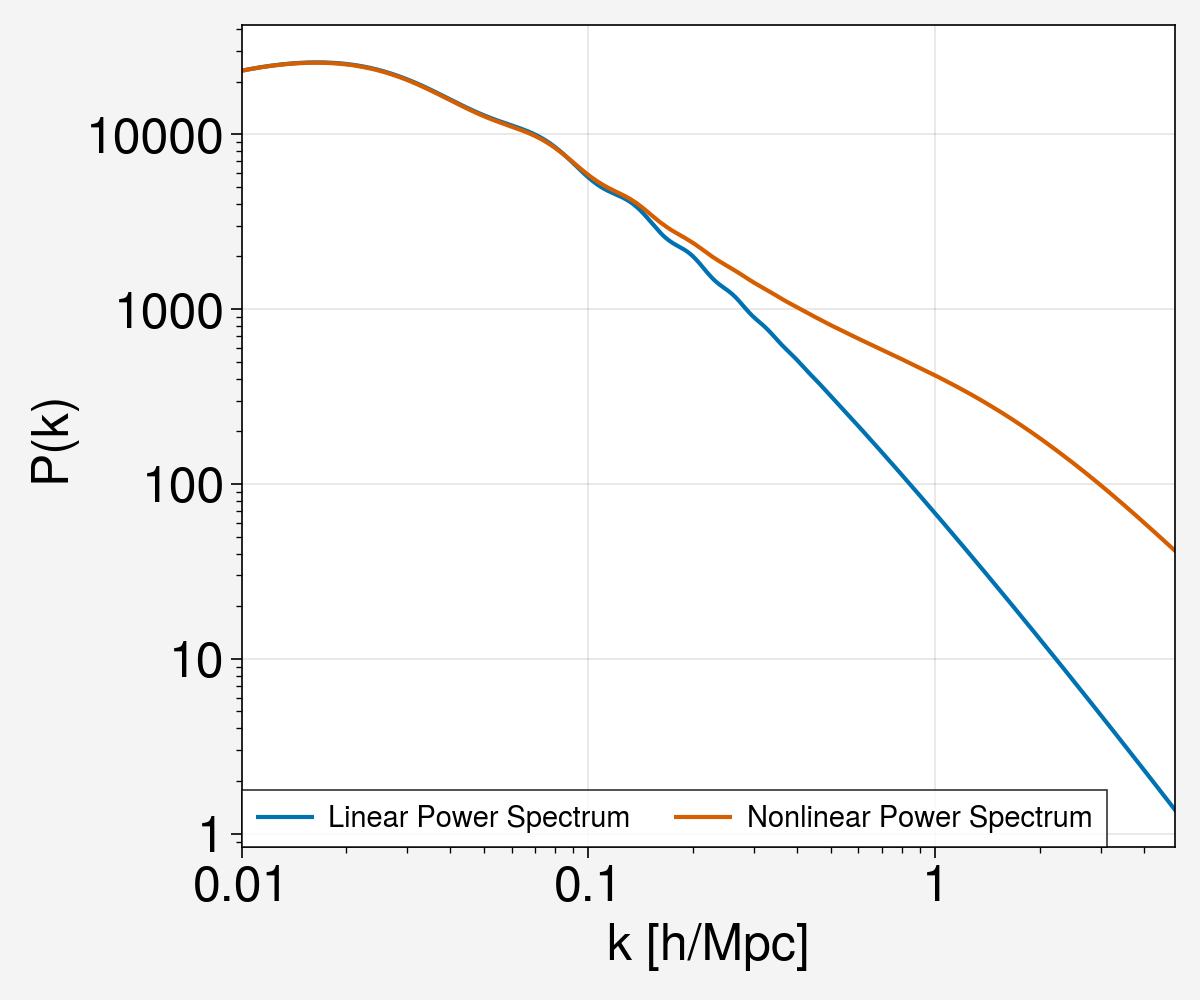

In [33]:
from matplotlib import pyplot as plt
import matplotlib
import proplot as pplt
%matplotlib inline

matplotlib.rcParams.update({'font.size': 18, 'legend.fontsize':'xx-small'})
fig, ax = pplt.subplots(figsize=(6,5))
ax.loglog(k, pk_lin_total, label="Linear Power Spectrum")
ax.loglog(k, pk_nl_cold, label="Nonlinear Power Spectrum")
ax.set_xlabel("k [h/Mpc]")
ax.set_ylabel("P(k)");
plt.legend()

In [38]:
# non-linear with baryons
params = {
    'omega_cold'    :  0.315,
    'sigma8_cold'   :  0.83,
    'omega_baryon'  :  0.05,
    'ns'            :  0.96,
    'hubble'        :  0.67,
    'neutrino_mass' :  0.0,
    'w0'            : -1.0,
    'wa'            :  0.0,
    'expfactor'     :  1,

    'M_c'           :  15,
    'eta'           : -0.3,
    'beta'          : 0.69,
    'M1_z0_cen'     : 10.5,
    'theta_out'     : 0.25,
    'theta_inn'     : -0.86,
    'M_inn'         : 13.4
}

k, S = mpk_emulator.get_baryonic_boost(k=k, **params)
k, pknl_bar = mpk_emulator.get_nonlinear_pk(k=k, baryonic_boost=True, **params)

                The maximum k of the baryonic boost emulator is 4.692772528625323 h/Mpc:
                the baryonic emulator is currently extrapolating to 4.903235148249275 h/Mpc;
                the extrapolation will likely be not accurate.
                
                The maximum k of the baryonic boost emulator is 4.692772528625323 h/Mpc:
                the baryonic emulator is currently extrapolating to 4.903235148249275 h/Mpc;
                the extrapolation will likely be not accurate.
                


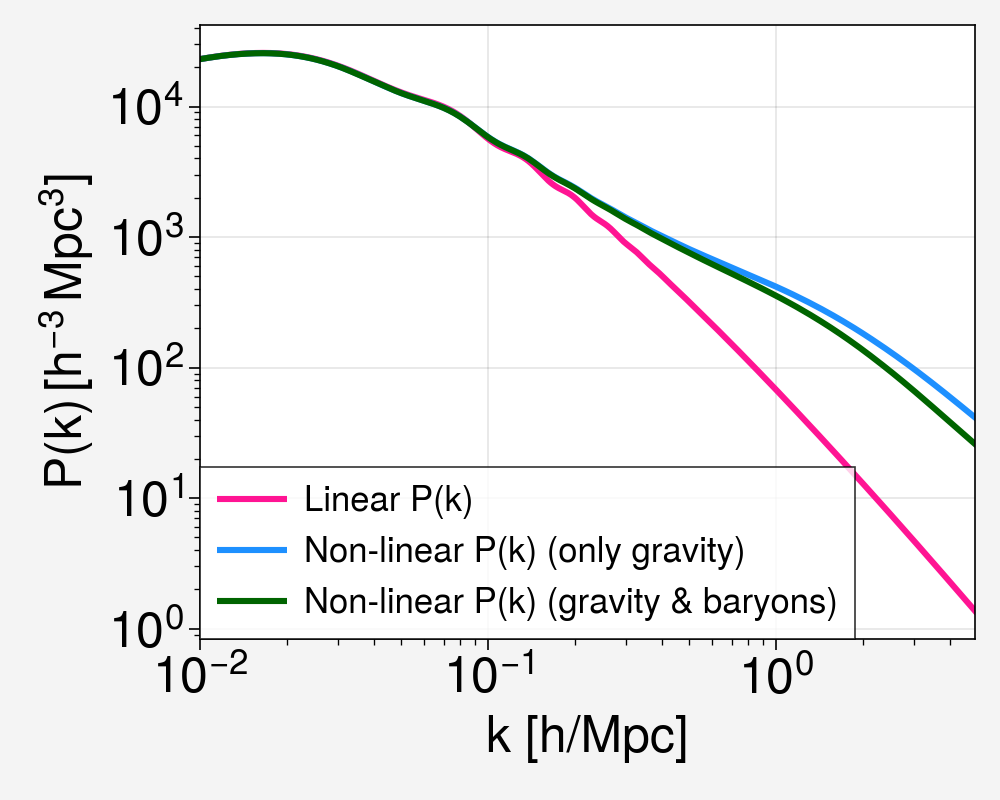

In [47]:
fig, ax = pplt.subplots(figsize=(5,4))

matplotlib.rcParams.update({'font.size': 18, 'legend.fontsize':'x-small'})
ax.loglog(k, pk_lin_total, label="Linear P(k)", c='deeppink', lw=2.2)
ax.loglog(k, pk_nl_cold, label="Non-linear P(k) (only gravity)", c='dodgerblue', lw=2.2)
ax.loglog(k, pknl_bar, label="Non-linear P(k) (gravity & baryons)", c='darkgreen', lw=2.2)
ax.set_xlabel("k [h/Mpc]")
ax.set_ylabel("$P(k)\,[h^{-3}\,\mathrm{Mpc}^{3}]$")
ax.set_xticklabels(np.array(['', r'$10^{-2}$', '$10^{-1}$', '$10^{0}$', '5']))
ax.set_yticklabels(np.array(['', '', r'$10^{0}$', '$10^{1}$', '$10^{2}$', '$10^{3}$', '$10^{4}$']))
plt.legend(ncol=1)
plt.savefig('~/DES/pk.pdf', bbox_inches='tight')